# Ear目标检测-可视化训练日志

Base 同济子豪兄 2023-4-5 三角板目标检测

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [1]:
import os
os.chdir('mmdetection')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [31]:
# 日志文件路径
# log_path = 'work_dirs/faster_r_cnn_triangle/20230511_234855/vis_data/scalars.json'
log_path = 'work_dirs/rtmdet_tiny_Ear/20230604_153610/vis_data/scalars.json'

In [32]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [33]:
len(json_list)

1257

In [34]:
eval(json_list[4])

{'lr': 1.6055855855855853e-05,
 'data_time': 3.2465591430664062,
 'loss': 0.44450490474700927,
 'loss_cls': 0.24857324361801147,
 'loss_bbox': 0.19593166559934616,
 'time': 3.8924522399902344,
 'epoch': 1,
 'iter': 5,
 'memory': 8782,
 'step': 5}

In [35]:
pd.__version__

'2.0.2'

In [36]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:00<00:00, 1949.82it/s]


In [37]:
df_train

,lr,data_time,loss,loss_cls,loss_bbox,time,epoch,iter,memory,step
0,4.000000e-08,11.128560,0.389119,0.249056,0.140064,11.905730,1.0,1.0,8725.0,1.0
1,4.043964e-06,5.565390,0.356984,0.248965,0.108019,6.266649,1.0,2.0,8782.0,2.0
2,8.047928e-06,3.710730,0.375608,0.248859,0.126749,4.382845,1.0,3.0,8782.0,3.0
3,1.205189e-05,2.783590,0.436619,0.248816,0.187804,3.440158,1.0,4.0,8782.0,4.0
4,1.605586e-05,3.246559,0.444505,0.248573,0.195932,3.892452,1.0,5.0,8782.0,5.0
...,...,...,...,...,...,...,...,...,...,...
1195,3.078729e-03,1.207620,0.313875,0.091084,0.222791,1.806418,200.0,1196.0,8782.0,1196.0
1196,3.073038e-03,1.109964,0.314099,0.091327,0.222772,1.708954,200.0,1197.0,8782.0,1197.0
1197,3.067335e-03,1.109981,0.315160,0.092258,0.222901,1.709167,200.0,1198.0,8782.0,1198.0
1198,3.061620e-03,1.153050,0.313876,0.091166,0.222710,1.752285,200.0,1199.0,8782.0,1199.0


In [38]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.000,0.000,0.000,-1.0,-1.0,0.000,1.367946,1.501286,5.0
1,0.028,0.090,0.005,-1.0,-1.0,0.028,1.342345,1.441777,10.0
2,0.097,0.247,0.041,-1.0,-1.0,0.097,1.377734,1.475629,15.0
3,0.146,0.402,0.085,-1.0,-1.0,0.146,1.371731,1.465200,20.0
4,0.360,0.781,0.186,-1.0,-1.0,0.360,1.389147,1.483750,25.0
5,0.401,0.843,0.350,-1.0,-1.0,0.401,1.390656,1.481514,30.0
6,0.315,0.839,0.213,-1.0,-1.0,0.315,1.401450,1.496237,35.0
7,0.463,0.945,0.346,-1.0,-1.0,0.463,1.395274,1.486552,40.0
8,0.459,0.905,0.371,-1.0,-1.0,0.459,1.404439,1.498903,45.0
9,0.544,0.959,0.537,-1.0,-1.0,0.544,1.391553,1.500148,50.0


## 导出训练日志表格

In [39]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [40]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [41]:
# # Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# # 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [42]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf

# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O ~/miniconda3/envs/openmmlab-pose/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib
!rm -rf ~/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


In [43]:
# from matplotlib.font_manager import FontManager
# fm = FontManager()
# mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

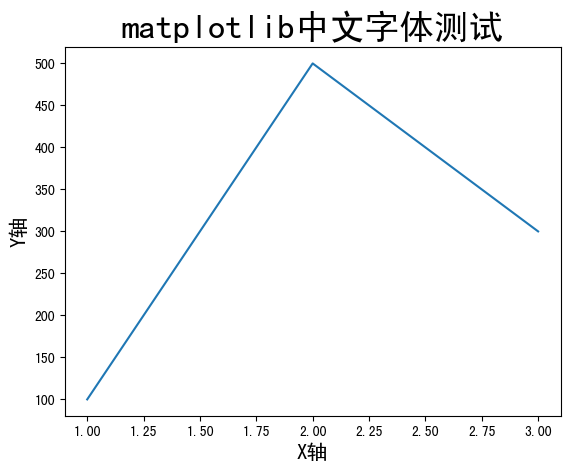

In [44]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [45]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [46]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

In [47]:
metrics = ['loss', 'loss_bbox', 'loss_cls']  # , 'loss_rpn_cls', 'loss_rpn_bbox'

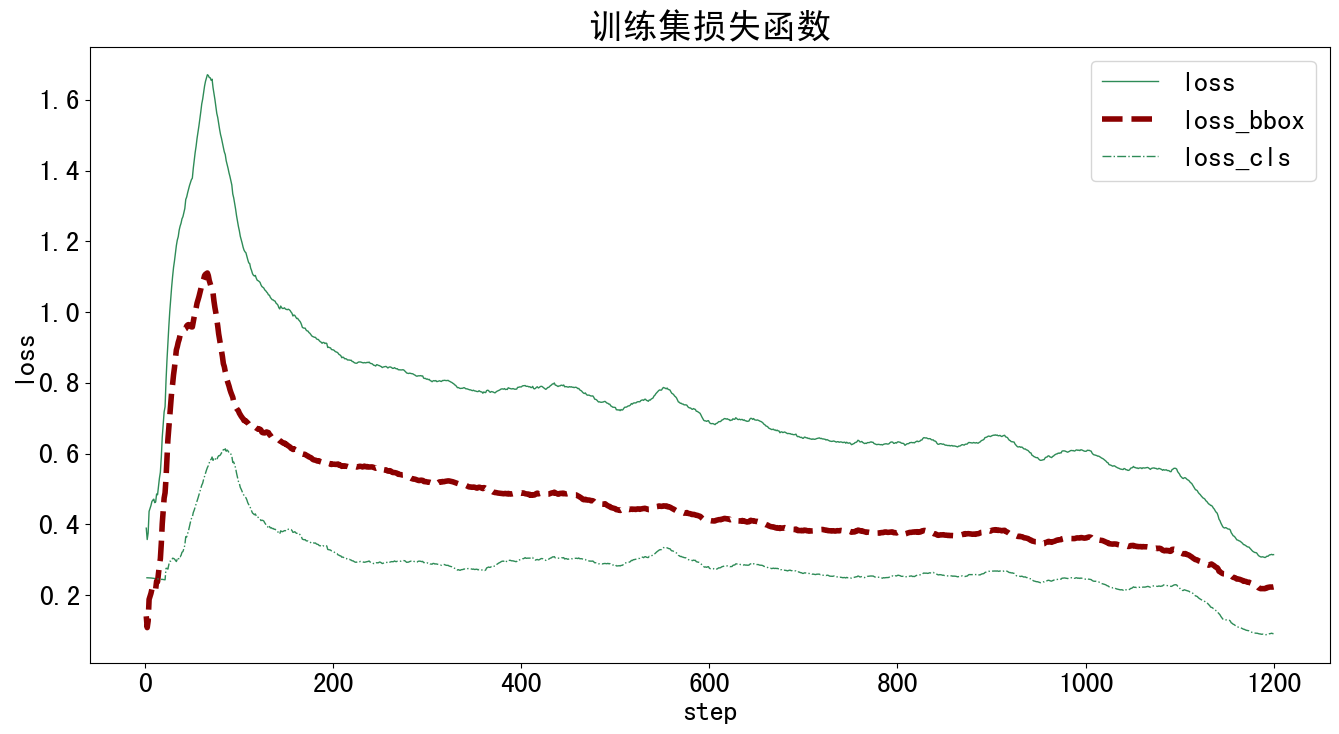

In [48]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [49]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')

In [50]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

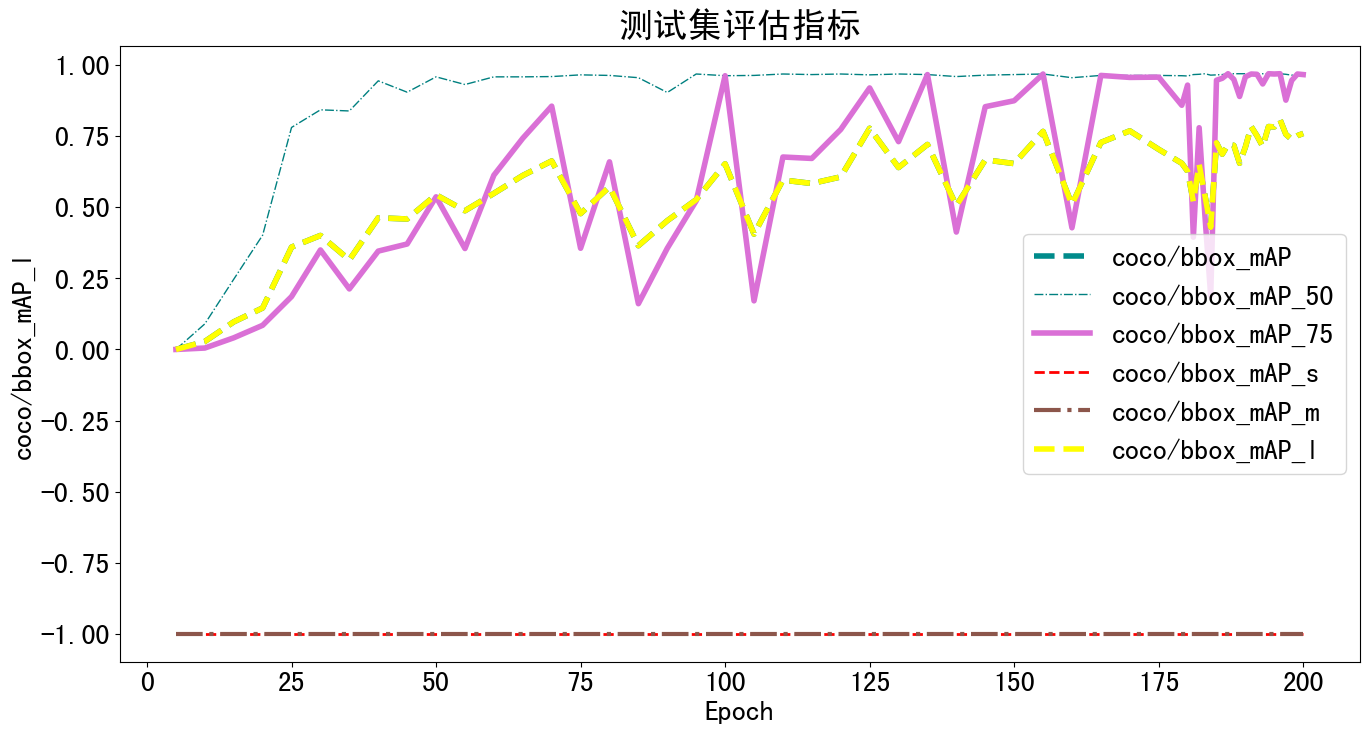

In [51]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()